In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
#tf.random.set_seed(7)
#tf.random.set_seed(77)

In [2]:
nc_f    = './icecon.APPX.Bering_Strait.nc'
#nc_f    = './icecon.APPX.90N.135W.nc'
nc_fid  = Dataset(nc_f, 'r')
time    = nc_fid.variables['record'][:]

In [3]:
#sic    = nc_fid.variables['icecon'][:,0,0]
#sic    = np.cos(time*np.pi)
#sic    = np.sin(time*np.pi)
#sic    = np.square(np.sin(time*np.pi))
#sic    = np.exp(np.sin(time*np.pi))
#sic    = np.square(np.exp(np.sin(time*np.pi)))
#sic    = np.square(np.square(np.exp(np.sin(time*np.pi))))
#sic    = np.square(np.square(np.exp(np.cos(time*np.pi))))
#sic    = np.arcsin(np.sin(time*np.pi))*180
#sic    = np.mod(np.degrees(time*np.pi),360)
#sic    = np.mod(np.sin(time*np.pi)*100,10)

#sic    = np.sin(time*np.pi)+np.random.normal(0,1,len(time))*0.1
#sic    = np.sin(time*np.pi)+np.random.normal(0,1,len(time))*0.2
#sic    = np.square(np.square(np.exp(np.cos(time*np.pi))))+np.random.normal(0,1,len(time))
#sic    = np.square(np.square(np.exp(np.cos(time*np.pi))))+np.random.normal(0,1,len(time))*3
#sic    = np.square(np.square(np.exp(np.sin(time*np.pi))))+np.random.normal(0,1,len(time))*3
sic    = np.round(np.square(np.round(np.cos(time*np.pi)*10))/10)*10+np.random.normal(0,1,len(time))*10

In [4]:
nmonth  = len(time)
sic_train       =  sic[0:nmonth-12]
time_train      = time[0:nmonth-12]

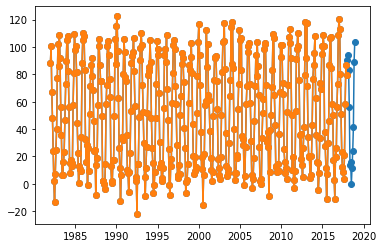

In [5]:
plt.plot(time,sic,'-o')
plt.plot(time_train,sic_train,'-o')

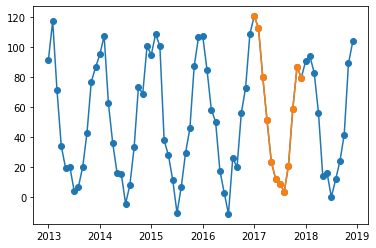

In [6]:
plt.plot(time[nmonth-72:],sic[nmonth-72:],'-o')
plt.plot(time_train[nmonth-24:nmonth-12],sic_train[nmonth-24:nmonth-12],'-o')

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return array(X), array(y)

In [8]:
n_steps = 12
X_SIC, Y_SIC = split_sequence(sic_train,n_steps)
print(X_SIC.shape)

(420, 12)


In [9]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_SIC, Y_SIC, epochs=2000, verbose=0)

In [10]:
sic_new = np.zeros(n_steps)

sic            at  2018.0 is  90.78379634075058
sic prediction at  2018.0 is  94.12211608886719

sic            at  2018.0833 is  93.97507290741729
sic prediction at  2018.0833 is  104.0933837890625

sic            at  2018.1666 is  83.0280967310137
sic prediction at  2018.1666 is  76.24642181396484

sic            at  2018.25 is  56.05249106336775
sic prediction at  2018.25 is  51.3786506652832

sic            at  2018.3333 is  13.758211240236005
sic prediction at  2018.3333 is  11.014139175415039

sic            at  2018.4166 is  15.89573043535535
sic prediction at  2018.4166 is  11.917145729064941

sic            at  2018.5 is  -0.22773483191722554
sic prediction at  2018.5 is  5.763156414031982

sic            at  2018.5833 is  11.557193963810343
sic prediction at  2018.5833 is  13.531957626342773

sic            at  2018.6666 is  23.738781885501194
sic prediction at  2018.6666 is  22.96027183532715

sic            at  2018.75 is  41.599903443438926
sic prediction at  2018.75 is  5

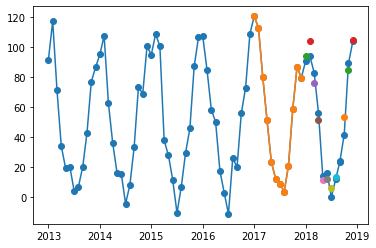

In [11]:
plt.plot(time[nmonth-72:],sic[nmonth-72:],'-o')
plt.plot(time_train[nmonth-24:nmonth-12],sic_train[nmonth-24:nmonth-12],'-o')
for i in range(n_steps):
        x_input = sic[nmonth-24+i:nmonth-12+i]
        #print(time[nmonth-24+i:nmonth-12+i])
        x_input = x_input.reshape((1, n_steps))
        
        #print(x_input)
        sic_new[i] = model.predict(x_input, verbose=0)
        print('sic            at ', time[nmonth-12+i],'is ', sic[nmonth-12+i])
        print('sic prediction at ', time[nmonth-12+i],'is ', sic_new[i])
        print('')
        plt.plot(time[nmonth-12+i],sic_new[i],'-o')
        #input('press return to continue')